In [1]:
# Load Libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Apple.csv")

# Data pre-processing

In [3]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,6/13/2022,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,6/14/2022,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,6/15/2022,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,6/16/2022,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [4]:
df.isnull().sum()  # no null values found

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.duplicated().sum() # no duplications

0

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [8]:
# Re-formating 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
###df.drop('Date', axis=1, inplace=True)

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Quarter
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,12,12,1980,4
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,15,12,1980,4
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,16,12,1980,4
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,17,12,1980,4
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,18,12,1980,4
...,...,...,...,...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,13,6,2022,2
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,14,6,2022,2
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,15,6,2022,2
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,16,6,2022,2


=========================================================================================================================

# Data visualizations

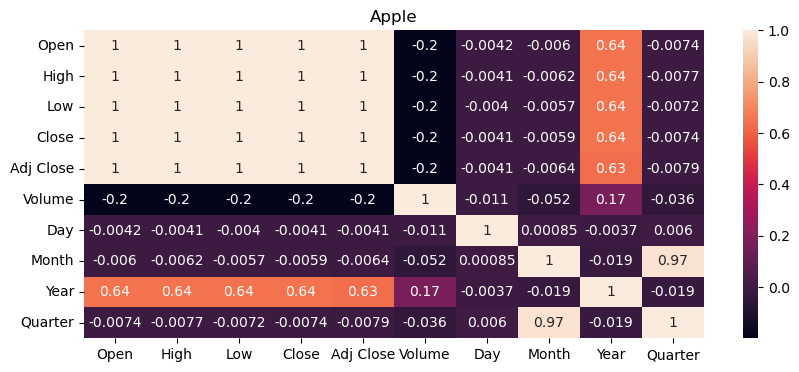

In [10]:
plt.figure(figsize=(10,4))
corr = df.iloc[:,:].corr(numeric_only = True)
sns.heatmap(corr, annot=True)
plt.title("Apple")
plt.show()

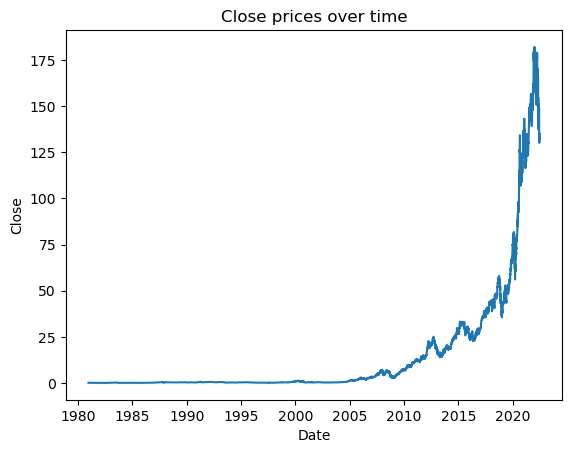

In [11]:
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close prices over time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

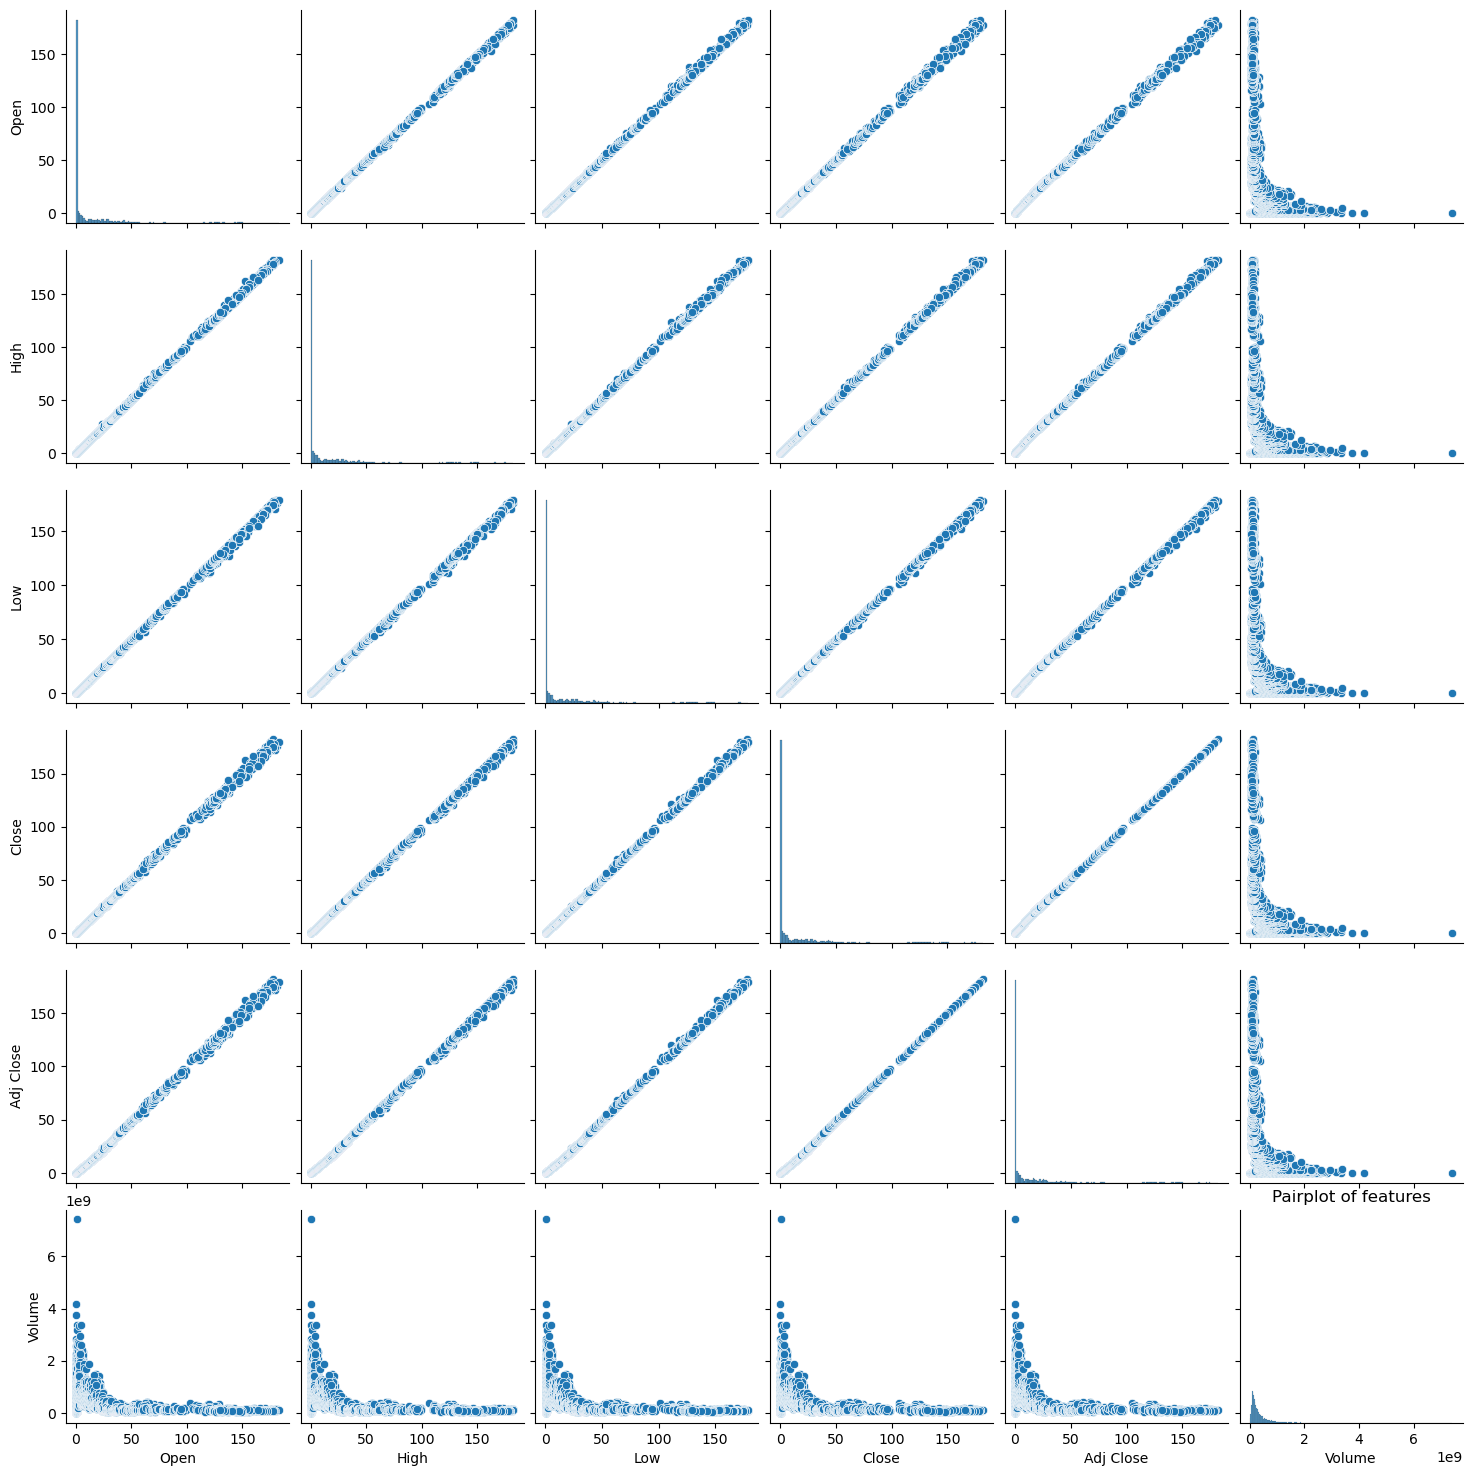

In [12]:
sns.pairplot(data=df, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
plt.title('Pairplot of features')
plt.show()

=========================================================================================================================

#                                                             Model training and evaluation

In [13]:
target = df['Close']
feats = df.drop(['Close', 'Date'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state=42)

In [14]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('MSE: ' + str("{:.2f}".format(mse_lr)))
print('RMSE: ' + str("{:.2f}".format(rmse_lr)))
print('MAE: ' + str("{:.2f}".format(mae_lr)))
print('MAPE: ' + str("{:.2f}".format(mape_lr)) + ' %')
print('R2_score: ' + str("{:.2f}".format(r2_lr)))

MSE: 0.05
RMSE: 0.22
MAE: 0.12
MAPE: 20.29 %
R2_score: 1.00


In [15]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('MSE: ' + str("{:.2f}".format(mse_rf)))
print('RMSE: ' + str("{:.2f}".format(rmse_rf)))
print('MAE: ' + str("{:.2f}".format(mae_rf)))
print('MAPE: ' + str("{:.2f}".format(mape_rf)) + ' %')
print('R2_score: ' + str("{:.2f}".format(r2_rf)))

MSE: 0.02
RMSE: 0.12
MAE: 0.04
MAPE: 0.47 %
R2_score: 1.00


In [16]:
# Support Vector Regression Model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svr_model = SVR(kernel='linear')
svr_model.fit(x_train_scaled, y_train)
y_pred_svr = svr_model.predict(x_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('MSE: ' + str("{:.2f}".format(mse_svr)))
print('RMSE: ' + str("{:.2f}".format(rmse_svr)))
print('MAE: ' + str("{:.2f}".format(mae_svr)))
print('MAPE: ' + str("{:.2f}".format(mape_svr)) + ' %')
print('R2_score: ' + str("{:.2f}".format(r2_svr)))

MSE: 0.08
RMSE: 0.29
MAE: 0.12
MAPE: 18.60 %
R2_score: 1.00


In [17]:
# Decision Tree Regression Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100
r2_dt = r2_score(y_test, y_pred_dt)

print('MSE: ' + str("{:.2f}".format(mse_dt)))
print('RMSE: ' + str("{:.2f}".format(rmse_dt)))
print('MAE: ' + str("{:.2f}".format(mae_dt)))
print('MAPE: ' + str("{:.2f}".format(mape_dt)) + ' %')
print('R2_score: ' + str("{:.2f}".format(r2_dt)))

MSE: 0.02
RMSE: 0.16
MAE: 0.05
MAPE: 0.61 %
R2_score: 1.00


In [18]:
# KNN Regression Model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(x_train_scaled, y_train)
y_pred_knn = knn_model.predict(x_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100
r2_knn = r2_score(y_test, y_pred_knn)


print('MSE: ' + str("{:.2f}".format(mse_knn)))
print('RMSE: ' + str("{:.2f}".format(rmse_knn)))
print('MAE: ' + str("{:.2f}".format(mae_knn)))
print('MAPE: ' + str("{:.2f}".format(mape_knn)) + ' %')
print('R2_score: ' + str("{:.2f}".format(r2_knn)))

MSE: 1.00
RMSE: 1.00
MAE: 0.54
MAPE: 29.73 %
R2_score: 1.00


# Conclusion

As we see, the least error rate in all error metrics were achieved by the #Random_Forest model and the #Decision_Tree